<a href="https://colab.research.google.com/github/rajaganesh1357/Time_Series_Repository/blob/main/Prophet_Stationary_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
!pip install Prophet

In [81]:
from prophet import Prophet

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/rajaganesh1357/Dataset/main/energy_consumption.csv')
data = df.copy()
data.head()

,timeStamp,demand,precip,temp
0,01-01-2012 00:00,4937.5,0.0,46.13
1,01-01-2012 01:00,4752.1,0.0,45.89
2,01-01-2012 02:00,4542.6,0.0,45.04
3,01-01-2012 03:00,4357.7,0.0,45.03
4,01-01-2012 04:00,4275.5,0.0,42.61


In [84]:
data['timeStamp']=pd.to_datetime(data['timeStamp'],format='%d-%m-%Y %H:%M')
data=data.rename(columns={'timeStamp':'ds','demand':'y'})
data.head()

,ds,y,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0,46.13
1,2012-01-01 01:00:00,4752.1,0.0,45.89
2,2012-01-01 02:00:00,4542.6,0.0,45.04
3,2012-01-01 03:00:00,4357.7,0.0,45.03
4,2012-01-01 04:00:00,4275.5,0.0,42.61


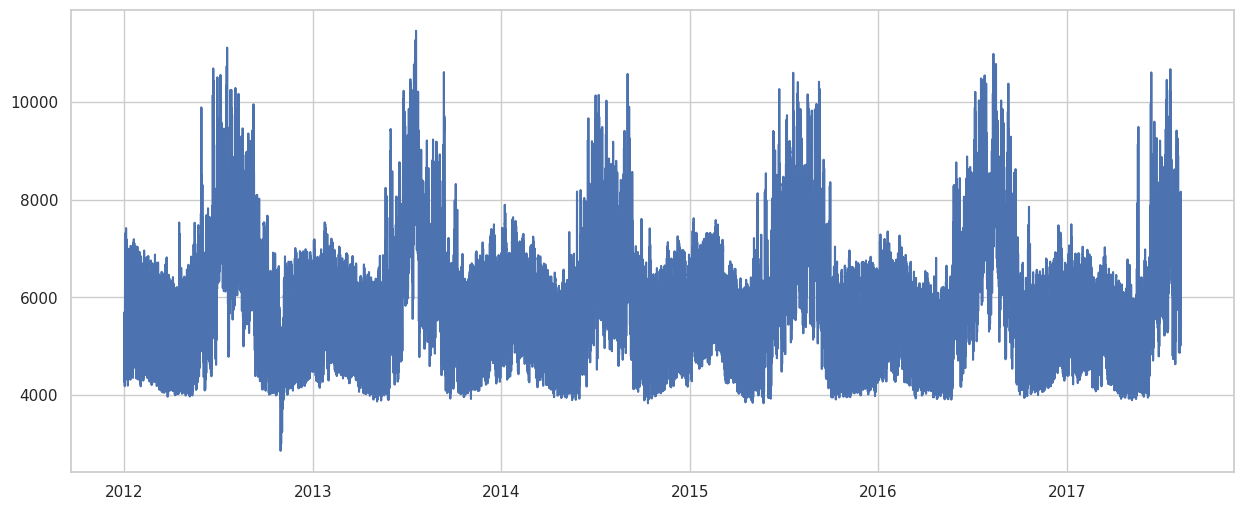

In [85]:
plt.figure(figsize=(15,6))
plt.plot(data['ds'],data['y'])
plt.show()

In [86]:
data['month'] = data['ds'].dt.month

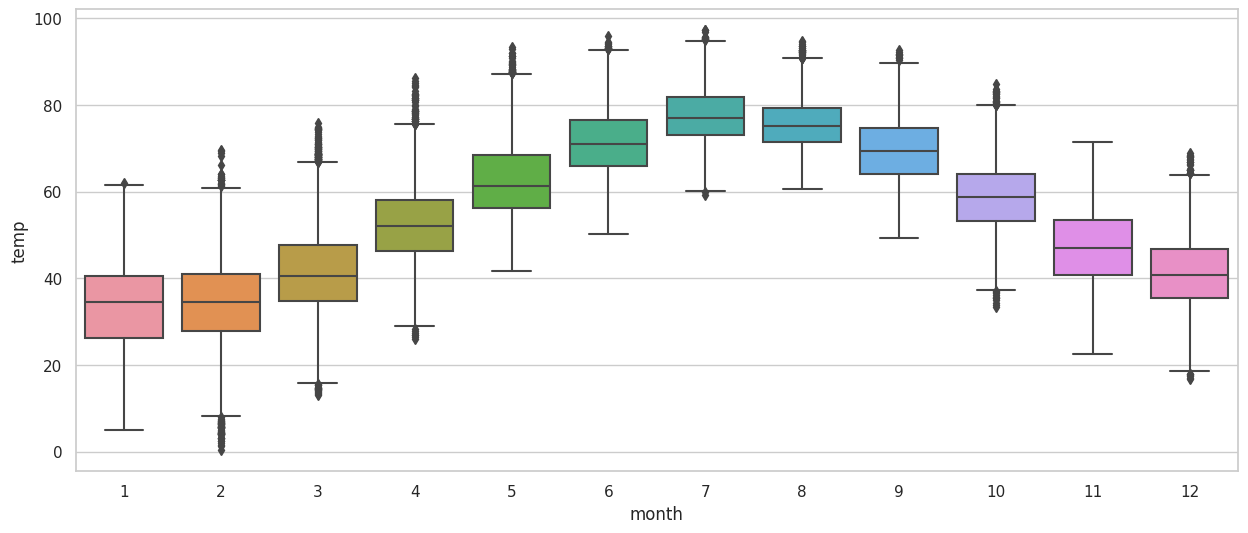

In [87]:
plt.figure(figsize=(15,6))
sns.set(style="whitegrid")
sns.boxplot(x=data['month'], y=data['temp'])
plt.show()

In [88]:
def high_temp(temp):
  if temp > 70:
    return 1
  else:
    return 0

In [89]:
data['high_temp']=data['temp'].apply(high_temp)

In [90]:
model_hourly = Prophet(interval_width=0.95,yearly_seasonality = True)

In [91]:
data['month_bin']=pd.cut(data['month'],bins=4, labels=False)

In [92]:
model_hourly.add_regressor('high_temp',standardize=False)

In [93]:
model_hourly.add_regressor('month_bin',standardize=False)


In [94]:
train=data[(data['ds'] >= '2012-01-01') & (data['ds'] <= '2017-04-30')]
test=data[(data['ds'] > '2017-04-30')]

In [95]:
test.shape

(2502, 7)

In [96]:
model_hourly.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp75c2jubw/s1j4fq11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75c2jubw/39hq0kzt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=819', 'data', 'file=/tmp/tmp75c2jubw/s1j4fq11.json', 'init=/tmp/tmp75c2jubw/39hq0kzt.json', 'output', 'file=/tmp/tmp75c2jubw/prophet_model7p5nvfqp/prophet_model-20230908163511.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:35:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [97]:
forecast_index_hourly = model_hourly.make_future_dataframe(periods=2502,freq='h')

In [98]:
forecast_index_hourly['high_temp'] = data['high_temp']

In [99]:
forecast_index_hourly['month_bin'] = data['month_bin']

In [100]:
forecast_hourly = model_hourly.predict(forecast_index_hourly)


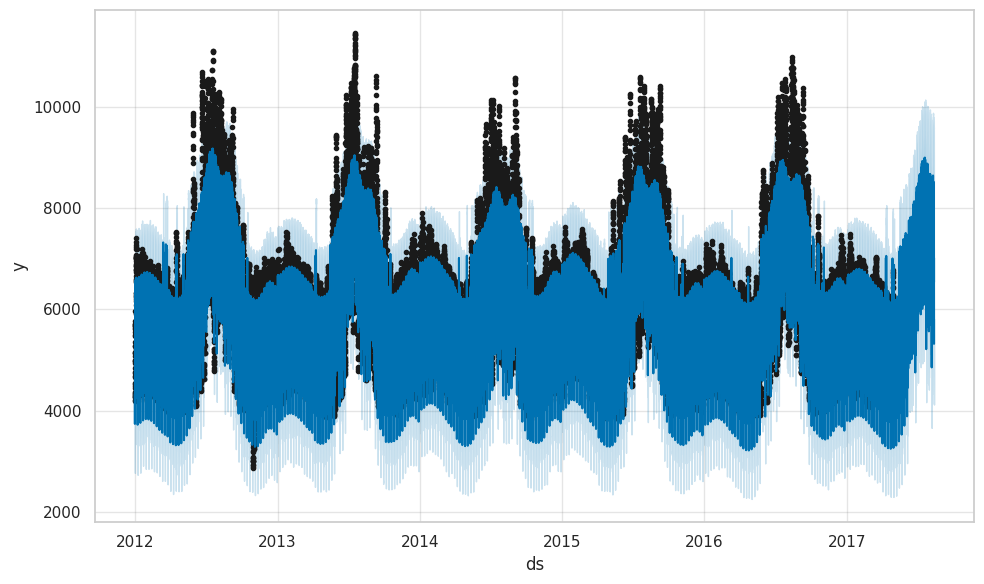

In [101]:
model_hourly.plot(forecast_hourly)
plt.show()

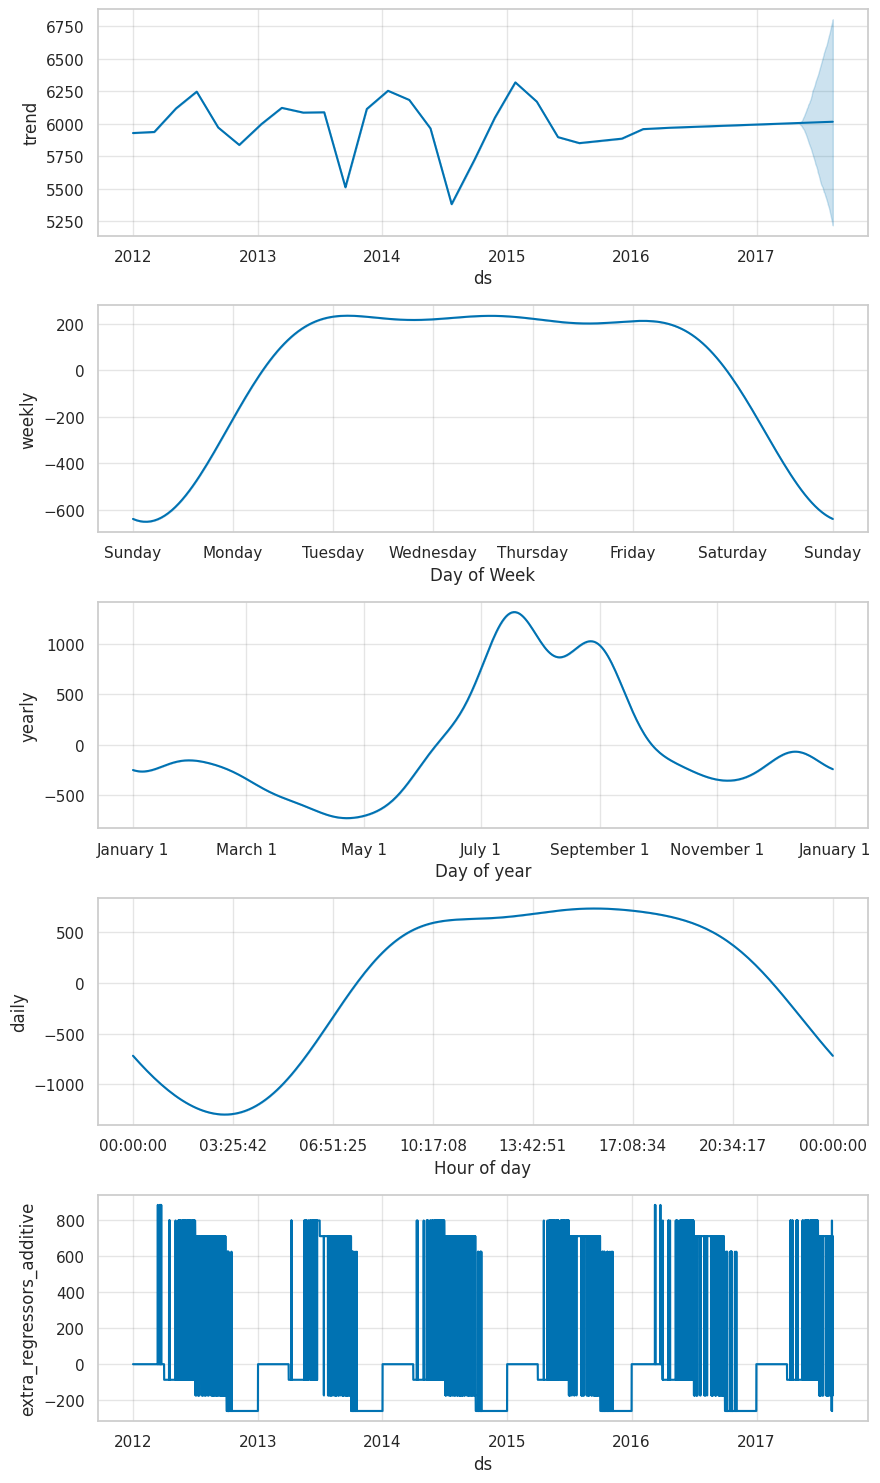

In [102]:
model_hourly.plot_components(forecast_hourly)
plt.show()

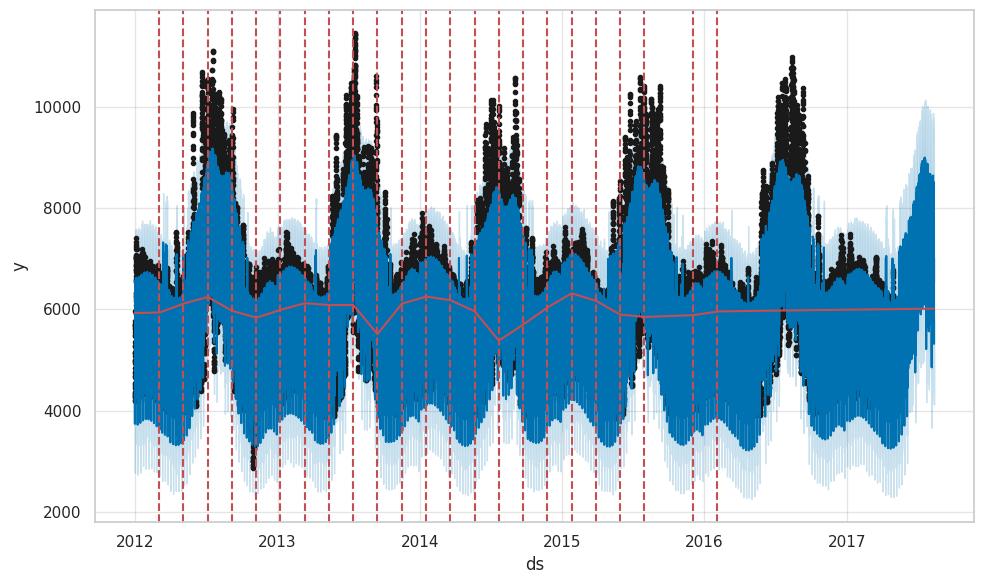

In [103]:
from prophet.plot import add_changepoints_to_plot
fig = model_hourly.plot(forecast_hourly)
a = add_changepoints_to_plot(fig.gca(), model_hourly, forecast_hourly)

In [104]:
from prophet.diagnostics import cross_validation
cv_results = cross_validation( model = model_hourly, initial = '731 days', horizon = '365 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp75c2jubw/0wca150l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75c2jubw/2v1ukecl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92757', 'data', 'file=/tmp/tmp75c2jubw/0wca150l.json', 'init=/tmp/tmp75c2jubw/2v1ukecl.json', 'output', 'file=/tmp/tmp75c2jubw/prophet_modelf_qxtu_q/prophet_model-20230908163701.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:37:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:37:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75c2jubw/afelebu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75c2jubw/5029qf27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [105]:
from prophet.diagnostics import performance_metrics
data_metrics = performance_metrics(cv_results)
data_metrics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 11:00:00,165170.456063,406.411683,303.728214,0.055656,0.041613,0.055902,0.957714
1,36 days 12:00:00,165264.765448,406.527693,303.907639,0.055682,0.041613,0.055930,0.957714
2,36 days 13:00:00,165390.091217,406.681806,304.132490,0.055716,0.041628,0.055965,0.957714
3,36 days 14:00:00,165749.679987,407.123667,304.563480,0.055788,0.041706,0.056035,0.957486
4,36 days 15:00:00,166122.496722,407.581276,305.016823,0.055865,0.041782,0.056111,0.957257
...,...,...,...,...,...,...,...,...
7881,364 days 20:00:00,193385.733176,439.756448,341.886404,0.064641,0.050973,0.067849,1.000000
7882,364 days 21:00:00,193270.826034,439.625780,341.789383,0.064634,0.050973,0.067841,1.000000
7883,364 days 22:00:00,193550.627573,439.943891,341.993443,0.064679,0.050973,0.067892,1.000000
7884,364 days 23:00:00,193893.343737,440.333219,342.267920,0.064740,0.051000,0.067960,1.000000
